<a href="https://colab.research.google.com/github/sunheehee/DArt-B_academiccontest/blob/main/%5BDArt_B%5D_%ED%95%99%EC%88%A0%EC%A0%9C_FRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ① FRI 구하기

## 산불 발생 경향성 데이터(14~23년도)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ddf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/다트비🎯/학술제/데이터/산불 발생 경향성 데이터(CSV).csv")
ddf

,Unnamed: 0,산불 발생 ID,발생 연도,발생 월,발생 일자,발생 시각,발생 요일,발생 시·도명,발생 시·군·구명,발생 읍·면·동명,...,피해 정도 코드,연령급 코드,해발(m),인접 산림과 거리(m),복합 여부,관리지 여부,묘지 여부,산불감시초소 거리(m),임도와의 거리(m),기상그룹데이터 여부
0,0,10,2014,1,13,12,월요일,강원특별자치도,화천군,상서면,...,NaN,NaN,280.0,22.005,0.0,0.0,0.0,12.898,3375.693,1.0
1,1,17,2014,1,15,16,수요일,강원특별자치도,삼척시,도계읍,...,2.0,4.0,605.0,439.767,0.0,0.0,0.0,5.865,1852.940,1.0
2,2,18,2014,1,16,10,목요일,강원특별자치도,정선군,북평면,...,2.0,6.0,960.0,1587.285,0.0,0.0,0.0,25.118,4432.070,1.0
3,3,23,2014,1,19,19,일요일,강원특별자치도,원주시,신림면,...,2.0,6.0,500.0,196.005,0.0,0.0,0.0,4.641,695.974,1.0
4,4,58,2014,2,4,19,화요일,강원특별자치도,양양군,양양읍,...,2.0,4.0,90.0,25.399,0.0,0.0,0.0,8.575,1180.751,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852,3852,5620,2023,10,29,16,일요일,충청남도,서산시,대산읍,...,2.0,4.0,5.0,21.603,0.0,0.0,0.0,7.433,17061.672,1.0
3853,3853,5631,2023,11,13,13,월요일,충청남도,서산시,대산읍,...,2.0,NaN,20.0,38.464,0.0,0.0,0.0,10.353,15698.504,1.0
3854,3854,5637,2023,11,21,20,화요일,충청남도,천안시동남구,병천면,...,2.0,4.0,365.0,438.615,0.0,0.0,0.0,11.450,1564.611,1.0
3855,3855,5656,2023,12,7,0,목요일,충청남도,천안시동남구,광덕면,...,1.0,4.0,140.0,54.233,0.0,0.0,0.0,6.977,1537.921,1.0


In [ ]:
df1 = ddf[ddf['발생 시·군·구명']=="안동시"]
df1.drop(['Unnamed: 0'], axis=1, inplace=True)
df1

<ipython-input-4-17fce033a5f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Unnamed: 0'], axis=1, inplace=True)


,산불 발생 ID,발생 연도,발생 월,발생 일자,발생 시각,발생 요일,발생 시·도명,발생 시·군·구명,발생 읍·면·동명,발생 리·동리명,...,피해 정도 코드,연령급 코드,해발(m),인접 산림과 거리(m),복합 여부,관리지 여부,묘지 여부,산불감시초소 거리(m),임도와의 거리(m),기상그룹데이터 여부
787,16,2014,1,15,15,수요일,경상북도,안동시,길안면,금곡리,...,2.0,3.0,375.0,206.540,0.0,1.0,0.0,30.800,37.811,1.0
793,38,2014,1,25,3,토요일,경상북도,안동시,서후면,재품리,...,2.0,4.0,300.0,56.522,0.0,1.0,0.0,9.812,132.913,1.0
806,60,2014,2,5,15,수요일,경상북도,안동시,와룡면,라소리,...,2.0,4.0,180.0,36.059,0.0,0.0,0.0,8.217,3586.833,1.0
807,61,2014,2,7,16,금요일,경상북도,안동시,녹전면,원천리,...,2.0,4.0,255.0,158.045,0.0,0.0,0.0,17.789,3290.225,1.0
814,98,2014,2,26,10,수요일,경상북도,안동시,풍천면,금계리,...,2.0,4.0,260.0,213.502,0.0,0.0,0.0,13.588,3508.590,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,5174,2023,2,25,10,토요일,경상북도,안동시,일직면,명진리,...,NaN,4.0,200.0,195.946,0.0,0.0,0.0,14.577,2728.984,1.0
1653,5212,2023,2,27,18,월요일,경상북도,안동시,임동면,망천리,...,2.0,3.0,185.0,149.509,0.0,0.0,0.0,13.401,3292.787,1.0
1666,5285,2023,3,6,16,월요일,경상북도,안동시,예안면,인계리,...,2.0,5.0,275.0,258.209,0.0,0.0,0.0,24.282,5147.468,1.0
1676,5383,2023,3,21,12,화요일,경상북도,안동시,도산면,의일리,...,1.0,4.0,310.0,141.074,0.0,0.0,0.0,5.944,1063.474,1.0


In [ ]:
df1.columns

Index(['산불 발생 ID', '발생 연도', '발생 월', '발생 일자', '발생 시각', '발생 요일', '발생 시·도명',
       '발생 시·군·구명', '발생 읍·면·동명', '발생 리·동리명', '발생 산번/번지', '발생 위치 X좌표',
       '발생 위치 Y좌표', '위치 ID', '진화 시간', '발생 원인', '피해 면적(ha)', '진화 자원 투입량',
       '기온(℃)', '습도(%)', '풍속(m/s)', '강수량(mm)', '임상 코드', '수종 코드', '밀도 코드',
       '수고(m)', '피해 정도 코드', '연령급 코드', '해발(m)', '인접 산림과 거리(m)', '복합 여부',
       '관리지 여부', '묘지 여부', '산불감시초소 거리(m)', '임도와의 거리(m)', '기상그룹데이터 여부'],
      dtype='object')

In [ ]:
# 데이터프레임 정리

# 날짜 합치기
df1['발생일'] = pd.to_datetime({
    'year': ddf['발생 연도'],
    'month': ddf['발생 월'],
    'day': ddf['발생 일자']
})


# 시간 문자열을 datetime 형식으로 변환
# format='%H:%M:%S' 제거하여 pandas가 형식을 추론하도록 합니다.
# 만약 여전히 문제가 발생하면, df['발생 시각']의 실제 데이터 형식을 확인하고
# 필요에 따라 데이터 클리닝 또는 format 인수를 조정해야 합니다.
df1['발생시간'] = pd.to_datetime(ddf['발생 시각'].astype(str) + ':00', format='%H:%M').dt.time


# 주소 합치기
df1['상세주소'] = df1['발생 읍·면·동명'].fillna('') + ' ' + df1['발생 리·동리명'].fillna('') + ' ' + df1['발생 산번/번지'].fillna('')


<ipython-input-6-cfb25bea237b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['발생일'] = pd.to_datetime({
<ipython-input-6-cfb25bea237b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['발생시간'] = pd.to_datetime(ddf['발생 시각'].astype(str) + ':00', format='%H:%M').dt.time
<ipython-input-6-cfb25bea237b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
df1.columns

Index(['산불 발생 ID', '발생 연도', '발생 월', '발생 일자', '발생 시각', '발생 요일', '발생 시·도명',
       '발생 시·군·구명', '발생 읍·면·동명', '발생 리·동리명', '발생 산번/번지', '발생 위치 X좌표',
       '발생 위치 Y좌표', '위치 ID', '진화 시간', '발생 원인', '피해 면적(ha)', '진화 자원 투입량',
       '기온(℃)', '습도(%)', '풍속(m/s)', '강수량(mm)', '임상 코드', '수종 코드', '밀도 코드',
       '수고(m)', '피해 정도 코드', '연령급 코드', '해발(m)', '인접 산림과 거리(m)', '복합 여부',
       '관리지 여부', '묘지 여부', '산불감시초소 거리(m)', '임도와의 거리(m)', '기상그룹데이터 여부', '발생일',
       '발생시간', '상세주소'],
      dtype='object')

In [ ]:
# 필요한 컬럼만 정리
df_final = df1[[
    '발생일', '발생시간', '발생 요일',
    '발생 시·도명', '발생 시·군·구명', '상세주소',
    '발생 원인', '피해 면적(ha)'
]].copy()
df_final.reset_index(drop=True, inplace=True)
df_final

,발생일,발생시간,발생 요일,발생 시·도명,발생 시·군·구명,상세주소,발생 원인,피해 면적(ha)
0,2014-01-15,15:00:00,수요일,경상북도,안동시,길안면 금곡리 산151,쓰레기소각,0.20
1,2014-01-25,03:00:00,토요일,경상북도,안동시,서후면 재품리 산76-2,쓰레기소각,0.02
2,2014-02-05,15:00:00,수요일,경상북도,안동시,와룡면 라소리 산168,건축물화재비화,0.01
3,2014-02-07,16:00:00,금요일,경상북도,안동시,녹전면 원천리 산132-1,농산부산물소각,0.10
4,2014-02-26,10:00:00,수요일,경상북도,안동시,풍천면 금계리 산63,입산자실화,0.10
...,...,...,...,...,...,...,...,...
86,2023-02-25,10:00:00,토요일,경상북도,안동시,일직면 명진리 산48-1,쓰레기소각,0.40
87,2023-02-27,18:00:00,월요일,경상북도,안동시,임동면 망천리 산68,담뱃불실화,0.60
88,2023-03-06,16:00:00,월요일,경상북도,안동시,예안면 인계리 산204,입산자실화,0.38
89,2023-03-21,12:00:00,화요일,경상북도,안동시,도산면 의일리 산122,농산부산물소각,10.84


In [ ]:
# 계절 추가
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 계절 컬럼 추가
df_final['계절'] = df_final['발생일'].dt.month.apply(get_season)

In [ ]:
df_final.columns = ['발생일', '발생시간', '요일', '시도', '시군구', '상세주소', '발생원인', '피해면적(ha)', '계절']
df_final

,발생일,발생시간,요일,시도,시군구,상세주소,발생원인,피해면적(ha),계절
0,2014-01-15,15:00:00,수요일,경상북도,안동시,길안면 금곡리 산151,쓰레기소각,0.20,겨울
1,2014-01-25,03:00:00,토요일,경상북도,안동시,서후면 재품리 산76-2,쓰레기소각,0.02,겨울
2,2014-02-05,15:00:00,수요일,경상북도,안동시,와룡면 라소리 산168,건축물화재비화,0.01,겨울
3,2014-02-07,16:00:00,금요일,경상북도,안동시,녹전면 원천리 산132-1,농산부산물소각,0.10,겨울
4,2014-02-26,10:00:00,수요일,경상북도,안동시,풍천면 금계리 산63,입산자실화,0.10,겨울
...,...,...,...,...,...,...,...,...,...
86,2023-02-25,10:00:00,토요일,경상북도,안동시,일직면 명진리 산48-1,쓰레기소각,0.40,겨울
87,2023-02-27,18:00:00,월요일,경상북도,안동시,임동면 망천리 산68,담뱃불실화,0.60,겨울
88,2023-03-06,16:00:00,월요일,경상북도,안동시,예안면 인계리 산204,입산자실화,0.38,봄
89,2023-03-21,12:00:00,화요일,경상북도,안동시,도산면 의일리 산122,농산부산물소각,10.84,봄


## 안동 데이터(16~24년도)

In [ ]:
Df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/다트비🎯/학술제/데이터/안동_산불통계.csv")
Df

,발생일,발생시간,진화일,진화시간,요일,시도,시군구,상세주소,발생원인,피해면적(ha),계절
0,2016-01-17,11:18:00,2016-01-17,12:25:00,일요일,경북,안동,풍산 마애 산35-3,농산부산물소각,0.01,겨울
1,2016-02-09,17:37:00,2016-02-09,18:40:00,화요일,경북,안동,풍산 노 산35,쓰레기소각,0.03,겨울
2,2016-03-03,13:55:00,2016-03-03,15:10:00,목요일,경북,안동,신세 산8-1,쓰레기소각,0.10,봄
3,2016-03-27,12:17:00,2016-03-27,13:55:00,일요일,경북,안동,임동 사월 산163,기타,0.20,봄
4,2016-03-30,17:47:00,2016-03-30,19:00:00,수요일,경북,안동,도산 의촌 산11,농산부산물소각,0.02,봄
...,...,...,...,...,...,...,...,...,...,...,...
64,2023-02-27,18:42:00,2023-02-27,21:15:00,월요일,경북,안동,임동 망천 산68,담뱃불실화,0.30,겨울
65,2023-03-06,16:49:00,2023-03-06,19:31:00,월요일,경북,안동,예안 인계 산204,입산자실화,0.12,봄
66,2023-03-21,12:12:00,2023-03-21,23:00:00,화요일,경북,안동,도산 의일 산122,농산부산물소각,10.00,봄
67,2023-04-17,11:56:00,2023-04-17,16:05:00,월요일,경북,안동,일직 평팔 산172,기타,1.20,봄


In [ ]:
Df.columns

Index(['발생일', '발생시간', '진화일', '진화시간', '요일', '시도', '시군구', '상세주소', '발생원인',
       '피해면적(ha)', '계절'],
      dtype='object')

In [ ]:
Df = Df.drop(['진화일','진화시간'],axis=1)

## 데이터프레임 합치기(중복 제외)

In [ ]:
# 주소 양식 통일
def expand_address(s):
    if pd.isna(s):
        return s
    tokens = s.split()
    if len(tokens) == 3:
        # 예: 임동 망천 산68 → 임동면 망천리 산68
        return f'{tokens[0]}면 {tokens[1]}리 {tokens[2]}'
    return s

Df['상세주소'] = Df['상세주소'].apply(expand_address)
Df['시도'] = Df['시도'].apply(lambda x: '경상북도')
Df['시군구'] = Df['시군구'].apply(lambda x: '안동시')
Df

,발생일,발생시간,요일,시도,시군구,상세주소,발생원인,피해면적(ha),계절
0,2016-01-17,11:18:00,일요일,경상북도,안동시,풍산면 마애리 산35-3,농산부산물소각,0.01,겨울
1,2016-02-09,17:37:00,화요일,경상북도,안동시,풍산면 노리 산35,쓰레기소각,0.03,겨울
2,2016-03-03,13:55:00,목요일,경상북도,안동시,신세 산8-1,쓰레기소각,0.10,봄
3,2016-03-27,12:17:00,일요일,경상북도,안동시,임동면 사월리 산163,기타,0.20,봄
4,2016-03-30,17:47:00,수요일,경상북도,안동시,도산면 의촌리 산11,농산부산물소각,0.02,봄
...,...,...,...,...,...,...,...,...,...
64,2023-02-27,18:42:00,월요일,경상북도,안동시,임동면 망천리 산68,담뱃불실화,0.30,겨울
65,2023-03-06,16:49:00,월요일,경상북도,안동시,예안면 인계리 산204,입산자실화,0.12,봄
66,2023-03-21,12:12:00,화요일,경상북도,안동시,도산면 의일리 산122,농산부산물소각,10.00,봄
67,2023-04-17,11:56:00,월요일,경상북도,안동시,일직면 평팔리 산172,기타,1.20,봄


In [ ]:
# 발생시간은 필요 없음
df3= df_final.drop(['발생시간','발생일'],axis=1)
df4 = Df.drop(['발생시간','발생일'],axis=1)

In [ ]:
df_union = pd.concat([df3, df4], ignore_index=True).drop_duplicates()
df_union

,요일,시도,시군구,상세주소,발생원인,피해면적(ha),계절
0,수요일,경상북도,안동시,길안면 금곡리 산151,쓰레기소각,0.20,겨울
1,토요일,경상북도,안동시,서후면 재품리 산76-2,쓰레기소각,0.02,겨울
2,수요일,경상북도,안동시,와룡면 라소리 산168,건축물화재비화,0.01,겨울
3,금요일,경상북도,안동시,녹전면 원천리 산132-1,농산부산물소각,0.10,겨울
4,수요일,경상북도,안동시,풍천면 금계리 산63,입산자실화,0.10,겨울
...,...,...,...,...,...,...,...
155,월요일,경상북도,안동시,임동면 망천리 산68,담뱃불실화,0.30,겨울
156,월요일,경상북도,안동시,예안면 인계리 산204,입산자실화,0.12,봄
157,화요일,경상북도,안동시,도산면 의일리 산122,농산부산물소각,10.00,봄
158,월요일,경상북도,안동시,일직면 평팔리 산172,기타,1.20,봄


In [ ]:
df_union.to_csv("FRI_Raw.csv",index=False)

In [ ]:
df = df_union.copy()
df

,요일,시도,시군구,상세주소,발생원인,피해면적(ha),계절
0,수요일,경상북도,안동시,길안면 금곡리 산151,쓰레기소각,0.20,겨울
1,토요일,경상북도,안동시,서후면 재품리 산76-2,쓰레기소각,0.02,겨울
2,수요일,경상북도,안동시,와룡면 라소리 산168,건축물화재비화,0.01,겨울
3,금요일,경상북도,안동시,녹전면 원천리 산132-1,농산부산물소각,0.10,겨울
4,수요일,경상북도,안동시,풍천면 금계리 산63,입산자실화,0.10,겨울
...,...,...,...,...,...,...,...
155,월요일,경상북도,안동시,임동면 망천리 산68,담뱃불실화,0.30,겨울
156,월요일,경상북도,안동시,예안면 인계리 산204,입산자실화,0.12,봄
157,화요일,경상북도,안동시,도산면 의일리 산122,농산부산물소각,10.00,봄
158,월요일,경상북도,안동시,일직면 평팔리 산172,기타,1.20,봄


In [ ]:
df.groupby('계절').count()

,요일,시도,시군구,상세주소,발생원인,피해면적(ha)
계절,,,,,,
가을,16,16,16,16,16,16
겨울,47,47,47,47,47,47
봄,57,57,57,57,57,57
여름,8,8,8,8,8,8


## SeasonalWeight
---
2가지 방식 존재

* baseline
* 엔트로피 기반 가중치 적용

### 베이스라인 모델(easy peasy)

In [ ]:
# 계절별 건수 및 피해면적 합계 계산
seasonal_stats = df.groupby("계절")["피해면적(ha)"].agg(["count", "sum"]).rename(columns={"count": "건수", "sum": "피해면적"})

seasonal_stats

,건수,피해면적
계절,,
가을,16,2.64
겨울,47,566.66
봄,57,2830.86
여름,8,0.57


<ipython-input-88-f16c96a140b7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='계절', order=order, palette=colors)


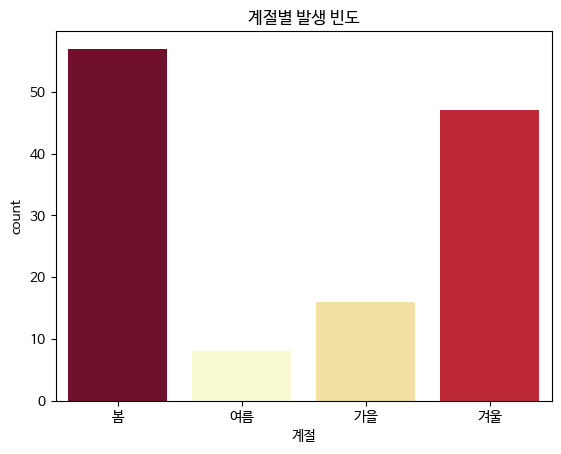

In [ ]:
# 시각화
# 계절별 개수 세기
order = ["봄", "여름", "가을", "겨울"]
counts = df['계절'].value_counts().reindex(order)

# 정규화하여 색상값으로 변환
norm = (counts - counts.min()) / (counts.max() - counts.min())
colors = [plt.cm.YlOrRd(val) for val in norm]  # 낮은값=노랑, 높은값=빨강

sns.countplot(data=df, x='계절', order=order, palette=colors)
plt.title("계절별 발생 빈도")
plt.show()

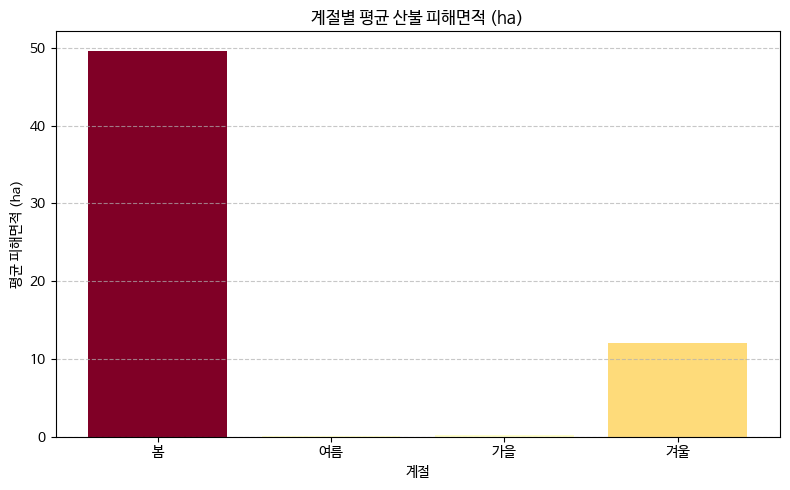

In [ ]:
import matplotlib.pyplot as plt

# 계절별 평균 피해면적 계산
avg_area_by_season = df.groupby('계절')['피해면적(ha)'].mean().round(2)
avg_area_by_season = avg_area_by_season.reindex(['봄', '여름', '가을', '겨울'])  # 계절 순서 정렬

# 정규화 → 컬러 맵 매핑
norm = (avg_area_by_season - avg_area_by_season.min()) / (avg_area_by_season.max() - avg_area_by_season.min())
colors = [plt.cm.YlOrRd(val) for val in norm]  # 낮은 피해면적: 노랑, 높은 피해면적: 빨강

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(avg_area_by_season.index, avg_area_by_season.values, color=colors)
plt.title('계절별 평균 산불 피해면적 (ha)')
plt.xlabel('계절')
plt.ylabel('평균 피해면적 (ha)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# 비율 계산
seasonal_stats["건수비율"] = seasonal_stats["건수"] / seasonal_stats["건수"].sum()
seasonal_stats["면적비율"] = seasonal_stats["피해면적"] / seasonal_stats["피해면적"].sum()

# 위험도 계산: 단순합 또는 alpha * 건수비율 + beta * 면적비율 형태로 확장 가능
seasonal_stats["위험도"] = seasonal_stats["건수비율"] + seasonal_stats["면적비율"]

# 정규화된 Seasonal Weight
mean_risk = seasonal_stats["위험도"].mean()
seasonal_stats["Seasonal Weight"] = seasonal_stats["위험도"] / mean_risk

# 결과 보기
print(seasonal_stats)

    건수     피해면적      건수비율      면적비율       위험도  Seasonal Weight
계절                                                            
가을  16     2.64  0.125000  0.000776  0.125776         0.251553
겨울  47   566.66  0.367188  0.166629  0.533816         1.067633
봄   57  2830.86  0.445312  0.832427  1.277740         2.555479
여름   8     0.57  0.062500  0.000168  0.062668         0.125335


### 엔트로피 기반 가중치

In [ ]:
# 비율 행렬
M = seasonal_stats[["건수비율", "면적비율"]].copy()
P = M.values

# 엔트로피 계산
k = 1 / np.log(len(P))  # 계절 수 (보통 4)
entropy = -k * np.sum(P * np.log(P + 1e-10), axis=0)  # log(0) 방지

# 정보량
info = 1 - entropy

# 변수별 가중치
var_weights = info / np.sum(info)

# 위험도 = 계절별 가중 평균
weighted_risk = (P * var_weights).sum(axis=1)

# 평균 위험도로 정규화
entropy_weights = weighted_risk / weighted_risk.mean()

# 결과 추가
seasonal_stats["Seasonal Weight_엔트로피"] = entropy_weights

In [ ]:
seasonal_stats

,건수,피해면적,건수비율,면적비율,위험도,Seasonal Weight,Seasonal Weight_엔트로피
계절,,,,,,,
가을,16,2.64,0.125000,0.000776,0.125776,0.251553,0.100053
겨울,47,566.66,0.367188,0.166629,0.533816,1.067633,0.823037
봄,57,2830.86,0.445312,0.832427,1.277740,2.555479,3.027593
여름,8,0.57,0.062500,0.000168,0.062668,0.125335,0.049316


### Q. 둘 중 어떤게 더 나은가?
-> 데이터가 적으므로 ROC-AUC같은 기법은 사용 x  
-> **지니계수(분산 비교 방법) 사용해서 적당한 애 확인만 해보고 정확한거는 최종 FRI 나온거 보고 시각적으로 비교해야할듯??**

In [ ]:
def gini(array):
    array = np.sort(np.array(array))  # 오름차순 정렬
    n = len(array)
    cum_weights = np.arange(1, n + 1)
    return (np.sum((2 * cum_weights - n - 1) * array)) / (n * np.sum(array))


In [ ]:
gini_baseline = gini(seasonal_stats['Seasonal Weight'])
gini_entropy = gini(seasonal_stats['Seasonal Weight_엔트로피'])

print("Baseline Gini:", gini_baseline)
print("Entropy Gini:", gini_entropy)

Baseline Gini: 0.5066570323228395
Entropy Gini: 0.6036134125161449




1. **Baseline 방식 (0.507)**

   * 위험도를 4계절에 **비교적 고르게 분배**
   * 계절별 위험 차이를 어느 정도 반영하면서도 과하게 한 계절만 부각하지 않음

2. **Entropy 방식 (0.604)**

   * 특정 계절(아마 ‘봄’)의 위험도가 과도하게 커져 있음
   * 정보량이 높은 ‘면적’ 변수에 과도하게 끌린 결과일 수 있음




## Fire Density
---
| 단계                        |
| ------------------------- |
| ① 주소 → 위경도 변환 (Geocoding) |   
| ② 위경도 → 5km 격자 ID 할당      |    
| ③ 각 격자의 발생 건수 집계          |    
| ④ 정규화하여 FireDensity 값 생성  |    


### 위경도 변환

In [ ]:
# 카카오맵 api 호출
import requests
import time
from tqdm import tqdm
import json

api_key = "901954547fc78ea4661d190309b42811"


def get_kakao_lat_lng(address, api_key):
    try:
        url = f'https://dapi.kakao.com/v2/local/search/address.json?query={address}'
        headers = {"Authorization": f"KakaoAK {api_key}"}
        api_json = requests.get(url, headers=headers).json()

        if len(api_json['documents']) == 0:
            return None, None

        address_data = api_json['documents'][0]['address']
        lat = float(address_data['y'])
        lng = float(address_data['x'])
        return lat, lng
    except Exception as e:
        print(f"Error at {address}: {e}")
        return None, None

In [ ]:
df["전체주소"] = df["시도"] + " " + df["시군구"] + " " + df["상세주소"]
df["위도"], df["경도"] = zip(*df["전체주소"].apply(lambda x: get_kakao_lat_lng(x, api_key)))

In [ ]:
df.head() # nan 존재

,요일,시도,시군구,상세주소,발생원인,피해면적(ha),계절,전체주소,위도,경도
0,수요일,경상북도,안동시,길안면 금곡리 산151,쓰레기소각,0.20,겨울,경상북도 안동시 길안면 금곡리 산151,36.383535,128.917165
1,토요일,경상북도,안동시,서후면 재품리 산76-2,쓰레기소각,0.02,겨울,경상북도 안동시 서후면 재품리 산76-2,36.644282,128.615786
2,수요일,경상북도,안동시,와룡면 라소리 산168,건축물화재비화,0.01,겨울,경상북도 안동시 와룡면 라소리 산168,36.660488,128.812479
3,금요일,경상북도,안동시,녹전면 원천리 산132-1,농산부산물소각,0.10,겨울,경상북도 안동시 녹전면 원천리 산132-1,NaN,NaN
4,수요일,경상북도,안동시,풍천면 금계리 산63,입산자실화,0.10,겨울,경상북도 안동시 풍천면 금계리 산63,36.511097,128.510749


In [ ]:
df[df['위도'].isna()]["전체주소"]

,전체주소
3,경상북도 안동시 녹전면 원천리 산132-1
5,경상북도 안동시 서후면 태장리 산134-1
13,경상북도 안동시 임하면 고곡리 산159-8
43,"경상북도 안동시 일직면 용각리 산6-1,6-2"
46,"경상북도 안동시 북후면 신전리 산96, 98"
52,경상북도 안동시 북후면 물한리 463-10
56,경상북도 안동시 일직면 운산리 산22-1
61,경상북도 안동시 예안면 동천리 산7-6
62,경상북도 안동시 서후면 광평리 산1143-2
91,경상북도 안동시 풍산면 마애리 산35-3


In [ ]:
# 텍스트 정제 함수
import re
# '정상' 주소 제거
df_clean = df[~df["전체주소"].str.contains("정상")].reset_index(drop=True)


def clean_address_keep_up_to_ri(addr):
    if "정상" in addr:
        return None

    # 쉼표 → 첫 번째 주소만
    addr = addr.split(",")[0]

    # '산' 포함 지번 제거 (예: '산35-3', '산147-2')
    addr = re.sub(r'\s?산\d+(-\d+)?', '', addr)

    # 혹시 남은 산도 제거
    addr = re.sub(r'\s?산', '', addr)

    # '리'까지 자르기
    match = re.search(r'.*?리', addr)
    if match:
        return match.group(0).strip()

    # 마지막 토큰이 '리'가 아니면 붙이기
    tokens = addr.strip().split()
    if len(tokens) >= 3 and not tokens[-1].endswith("리"):
        tokens[-1] += "리"
        return " ".join(tokens)

    return None


In [ ]:
def get_lat_lng_with_fallback_strong(address, api_key):
    lat, lng = get_kakao_lat_lng(address, api_key)
    if lat is None or lng is None:
        cleaned = clean_address_keep_up_to_ri(address)
        if cleaned is None:
            print(f"❌ 무시됨: {address}")
            return None, None
        print(f"🔁 재시도: {cleaned}")
        lat, lng = get_kakao_lat_lng(cleaned, api_key)
    return lat, lng



# FireDensity용 새 DataFrame 생성
tqdm.pandas()
fire_density = pd.DataFrame()
fire_density["전체주소"] = df_clean["전체주소"]
fire_density["위도"], fire_density["경도"] = zip(
    *fire_density["전체주소"].progress_apply(lambda x: get_lat_lng_with_fallback_strong(x, api_key))
)

  3%|▎         | 4/126 [00:01<00:54,  2.24it/s]

🔁 재시도: 경상북도 안동시 녹전면 원천리


  5%|▍         | 6/126 [00:03<01:16,  1.57it/s]

🔁 재시도: 경상북도 안동시 서후면 태장리


 11%|█         | 14/126 [00:08<01:04,  1.75it/s]

🔁 재시도: 경상북도 안동시 임하면 고곡리


 35%|███▍      | 44/126 [00:27<00:53,  1.52it/s]

🔁 재시도: 경상북도 안동시 일직면 용각리


 37%|███▋      | 47/126 [00:30<00:55,  1.43it/s]

🔁 재시도: 경상북도 안동시 북후면 신전리


 42%|████▏     | 53/126 [00:34<00:50,  1.45it/s]

🔁 재시도: 경상북도 안동시 북후면 물한리


 45%|████▌     | 57/126 [00:37<00:49,  1.38it/s]

🔁 재시도: 경상북도 안동시 일직면 운리


 49%|████▉     | 62/126 [00:41<00:44,  1.45it/s]

🔁 재시도: 경상북도 안동시 예안면 동천리


 50%|█████     | 63/126 [00:42<00:51,  1.22it/s]

🔁 재시도: 경상북도 안동시 서후면 광평리


 73%|███████▎  | 92/126 [01:00<00:18,  1.79it/s]

🔁 재시도: 경상북도 안동시 풍면 마애리


 74%|███████▍  | 93/126 [01:01<00:23,  1.38it/s]

🔁 재시도: 경상북도 안동시 풍면 노리


 75%|███████▌  | 95/126 [01:02<00:23,  1.33it/s]

🔁 재시도: 경상북도 안동시 풍면 노리


 79%|███████▉  | 100/126 [01:06<00:16,  1.61it/s]

🔁 재시도: 경상북도 안동시 일직면 용각리


 80%|████████  | 101/126 [01:07<00:19,  1.28it/s]

🔁 재시도: 경상북도 안동시 북후 신전리


 82%|████████▏ | 103/126 [01:09<00:18,  1.26it/s]

🔁 재시도: 경상북도 안동시 도면 가솜리


 83%|████████▎ | 104/126 [01:10<00:19,  1.12it/s]

🔁 재시도: 경상북도 안동시 녹전면 신평리


 83%|████████▎ | 105/126 [01:11<00:20,  1.04it/s]

🔁 재시도: 경상북도 안동시 일직면 운리


 84%|████████▍ | 106/126 [01:12<00:20,  1.00s/it]

🔁 재시도: 경상북도 안동시 서후면 광평리


 85%|████████▍ | 107/126 [01:13<00:19,  1.03s/it]

🔁 재시도: 경상북도 안동시 도면 문곡리


 86%|████████▌ | 108/126 [01:14<00:19,  1.07s/it]

🔁 재시도: 경상북도 안동시 풍면 수리


 87%|████████▋ | 110/126 [01:16<00:15,  1.05it/s]

🔁 재시도: 경상북도 안동시 풍면 매곡리


 88%|████████▊ | 111/126 [01:17<00:14,  1.01it/s]

🔁 재시도: 경상북도 안동시 풍면 현애리


 90%|█████████ | 114/126 [01:19<00:09,  1.28it/s]

🔁 재시도: 경상북도 안동시 풍면 마애리


 91%|█████████▏| 115/126 [01:20<00:09,  1.13it/s]

🔁 재시도: 경상북도 안동시 풍면 오미리


 92%|█████████▏| 116/126 [01:21<00:09,  1.04it/s]

🔁 재시도: 경상북도 안동시 풍면 회곡리


100%|██████████| 126/126 [01:28<00:00,  1.42it/s]


In [ ]:
fire_density[fire_density['위도'].isna()]['전체주소']

,전체주소
56,경상북도 안동시 일직면 운산리 산22-1
91,경상북도 안동시 풍산면 마애리 산35-3
92,경상북도 안동시 풍산면 노리 산35
94,경상북도 안동시 풍산면 노리 산56
102,경상북도 안동시 도산면 가솜리 산105
104,경상북도 안동시 일직면 운산리 산22-1
106,경상북도 안동시 도산면 문곡리 산48
107,경상북도 안동시 풍산면 수리 산23-1
109,경상북도 안동시 풍산면 매곡리 산91
110,경상북도 안동시 풍산면 현애리 산14-1


In [ ]:
# 1. 문제 주소 리스트
problem_addresses = [
    "경상북도 안동시 일직면 운산리 산22-1",
    "경상북도 안동시 풍산면 마애리 산35-3",
    "경상북도 안동시 풍산면 노리 산35",
    "경상북도 안동시 풍산면 노리 산56",
    "경상북도 안동시 도산면 가솜리 산105",
    "경상북도 안동시 일직면 운산리 산22-1",
    "경상북도 안동시 도산면 문곡리 산48",
    "경상북도 안동시 풍산면 수리 산23-1",
    "경상북도 안동시 풍산면 매곡리 산91",
    "경상북도 안동시 풍산면 현애리 산14-1",
    "경상북도 안동시 풍산면 마애리 산18",
    "경상북도 안동시 풍산면 오미리 산147-2",
    "경상북도 안동시 풍산면 회곡리 산107",
]


# 2. '리'까지만 자르는 함수
def trim_to_ri(address):
    match = re.search(r".*?리", address)
    return match.group(0).strip() if match else address

# 3. 위경도 요청 함수
def get_lat_lng(address, api_key):
    try:
        url = f"https://dapi.kakao.com/v2/local/search/address.json?query={address}"
        headers = {"Authorization": f"KakaoAK {api_key}"}
        res = requests.get(url, headers=headers).json()
        if res["documents"]:
            doc = res["documents"][0]["address"]
            return float(doc["y"]), float(doc["x"])
        return None, None
    except:
        return None, None

In [ ]:
records = []
for addr in problem_addresses:
    trimmed = trim_to_ri(addr)
    lat, lng = get_lat_lng(trimmed, api_key)
    time.sleep(0.3)
    records.append({"전체주소": addr, "정제주소": trimmed, "위도": lat, "경도": lng})

fire_patch = pd.DataFrame(records)

In [ ]:
fire_patch["trimmed_주소"] = fire_patch["전체주소"].apply(trim_to_ri)
fire_density["trimmed_주소"] = fire_density["전체주소"].apply(trim_to_ri)

In [ ]:
for _, row in fire_patch.dropna(subset=["위도", "경도"]).iterrows():
    fire_density.loc[
        fire_density["trimmed_주소"] == row["trimmed_주소"],
        ["위도", "경도"]
    ] = row["위도"], row["경도"]


In [ ]:
fire_density.dropna(inplace=True)

In [ ]:
fire_density

,전체주소,위도,경도,trimmed_주소
0,경상북도 안동시 길안면 금곡리 산151,36.383535,128.917165,경상북도 안동시 길안면 금곡리
1,경상북도 안동시 서후면 재품리 산76-2,36.644282,128.615786,경상북도 안동시 서후면 재품리
2,경상북도 안동시 와룡면 라소리 산168,36.660488,128.812479,경상북도 안동시 와룡면 라소리
3,경상북도 안동시 녹전면 원천리 산132-1,36.796564,128.757164,경상북도 안동시 녹전면 원천리
4,경상북도 안동시 풍천면 금계리 산63,36.511097,128.510749,경상북도 안동시 풍천면 금계리
...,...,...,...,...
121,경상북도 안동시 임동면 망천리 산68,36.548565,128.886999,경상북도 안동시 임동면 망천리
122,경상북도 안동시 예안면 인계리 산204,36.688353,128.921559,경상북도 안동시 예안면 인계리
123,경상북도 안동시 도산면 의일리 산122,36.742776,128.800209,경상북도 안동시 도산면 의일리
124,경상북도 안동시 일직면 평팔리 산172,36.415087,128.608140,경상북도 안동시 일직면 평팔리


In [ ]:
fire_density.to_csv("fire_density.csv",index=False)

### 5km 격자 할당

In [ ]:
import math

# 기준점 자동 설정
lat0 = fire_density["위도"].min()
lon0 = fire_density["경도"].min()

# 격자 크기 (5km)
lat_step = 0.045
lon_step = 0.055

# 격자 ID 계산 함수
def get_grid_id(lat, lon, lat0, lon0, lat_step, lon_step):
    try:
        i = math.floor((lat - lat0) / lat_step)
        j = math.floor((lon - lon0) / lon_step)
        return f"{i}_{j}"
    except:
        return None

# 1️⃣ 모든 row에 격자 ID 부여
fire_density["격자ID"] = fire_density.apply(
    lambda row: get_grid_id(row["위도"], row["경도"], lat0, lon0, lat_step, lon_step), axis=1
)


In [ ]:
# 2️⃣ 전체 격자 범위 계산
i_max = math.floor((fire_density["위도"].max() - lat0) / lat_step)
j_max = math.floor((fire_density["경도"].max() - lon0) / lon_step)

# 3️⃣ 전체 격자 목록 생성 (빈 격자 포함)
grid_list = []
for i in range(i_max + 1):
    for j in range(j_max + 1):
        grid_id = f"{i}_{j}"
        center_lat = lat0 + (i + 0.5) * lat_step
        center_lon = lon0 + (j + 0.5) * lon_step
        grid_list.append({"격자ID": grid_id, "중심위도": center_lat, "중심경도": center_lon})

grid_df = pd.DataFrame(grid_list)

# 4️⃣ 발생 건수 집계
count_df = fire_density["격자ID"].value_counts().reset_index()
count_df.columns = ["격자ID", "건수"]

# 5️⃣ 전체 격자에 발생 건수 병합 (없는 건수는 0으로)
grid_counts = grid_df.merge(count_df, on="격자ID", how="left")
grid_counts["건수"] = grid_counts["건수"].fillna(0)

# 6️⃣ FireDensity 정규화 (0 ~ 2.0)
max_count = grid_counts["건수"].max()
grid_counts["FireDensity"] = grid_counts["건수"] / max_count * 2.0 if max_count > 0 else 0

In [ ]:
grid_counts

,격자ID,중심위도,중심경도,건수,FireDensity
0,0_0,36.406035,128.525209,0.0,0.000000
1,0_1,36.406035,128.580209,0.0,0.000000
2,0_2,36.406035,128.635209,2.0,0.666667
3,0_3,36.406035,128.690209,0.0,0.000000
4,0_4,36.406035,128.745209,0.0,0.000000
...,...,...,...,...,...
85,9_4,36.811035,128.745209,1.0,0.333333
86,9_5,36.811035,128.800209,1.0,0.333333
87,9_6,36.811035,128.855209,0.0,0.000000
88,9_7,36.811035,128.910209,0.0,0.000000


In [ ]:
grid_counts['FireDensity'].unique()

array([0.        , 0.66666667, 1.        , 1.66666667, 1.33333333,
       0.33333333, 2.        ])

In [ ]:
import folium
from IPython.display import display

# 중심 좌표
center_lat = grid_counts["중심위도"].mean()
center_lon = grid_counts["중심경도"].mean()

# 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles="CartoDB positron")

# 색상 함수
def get_color(density):
    if density == 0:
        return "yellowgreen"
    elif density < 0.5:
        return "lightblue"
    elif density < 1.0:
        return "blue"
    elif density < 1.5:
        return "orange"
    else:
        return "red"

# 마커 추가
for _, row in grid_counts.iterrows():
    folium.CircleMarker(
        location=[row["중심위도"], row["중심경도"]],
        radius=8,
        color=get_color(row["FireDensity"]),
        fill=True,
        fill_opacity=0.8,
        popup=f"격자: {row['격자ID']}<br>건수: {row['건수']}<br>FD: {row['FireDensity']:.2f}"
    ).add_to(m)

# 코랩 내에서 바로 표시!
display(m)


In [ ]:
m.save("fire_density_map.html")  # HTML 저장
from google.colab import files
files.download("fire_density_map.html")  # 다운로드 버튼 자동 생성

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## FFMC
---
| 기호 | 의미 | 단위 | 수집 가능 여부 |  |
| --- | --- | --- | --- | --- |
| T | 계절별 평균 기온 | ℃ | 기상청 가능 |  |
| H | 계절별 평균 상대습도 | % | 기상청 가능 |  |
| W | 계절별 평균 풍속 | km/h | 기상청 가능 |  |
| P | 계절별 평균 강수량 | mm | 기상청 가능 |  |
| FFMCprev | 전기 FFMC 값 | 없음 | **초기값 85로 고정** |  |



In [ ]:
weather = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/다트비🎯/학술제/데이터/기상데이터.xlsx")
weather.head()

,연도,계절,기온,강수량(mm),평균습도(%),평균 풍속(m/s)
0,2016,봄,13.4,223.5,55.3,1.9
1,2016,여름,25.1,355.9,69.7,1.7
2,2016,가을,14.2,267.2,75.0,1.2
3,2016,겨울,0.6,77.2,58.7,1.8
4,2017,봄,13.2,132.4,53.3,1.9


In [ ]:
# 1. 열 이름 정리
weather.columns = weather.columns.str.strip()
weather.rename(columns={
    "기온": "T",
    "강수량(mm)": "P",
    "평균 풍속(m/s)": "W",
    "평균습도(%)": "AH"  # 실제 값은 절대습도로 간주
}, inplace=True)

# 2. 풍속 단위 변환 (m/s → km/h)
weather["W"] = weather["W"] * 3.6

# 3. 절대습도 → 상대습도 변환
def absolute_to_relative_humidity(ah, temp):
    saturation_ah = (
        6.112 * np.exp((17.67 * temp) / (temp + 243.5)) * 2.1674
    ) / (temp + 273.15)
    return (ah / saturation_ah) * 100

weather["H"] = absolute_to_relative_humidity(weather["AH"], weather["T"])

In [ ]:
# FFMC_prev 그대로
FFMC_prev = 85
weather["mo"] = 147.2 * (101 - FFMC_prev) / (59.5 + FFMC_prev)

# mr = mo 그대로 유지
weather["mr"] = weather["mo"]

# 기존 그대로
T = weather["T"]
H = weather["H"]
W = weather["W"].clip(lower=0.1)

weather["Ed"] = (
    0.942 * H**0.679 +
    11 * np.exp(np.clip((H - 100) / 10, -20, 0)) +  # H > 100일 때 폭발 방지
    0.18 * (21.1 - T) * (1 - np.exp(-0.115 * H))
)


# K 계산 안정화
weather["K"] = (
    0.424 * (1 - (H / 100) ** 1.2)
    + 0.0694 * np.sqrt(W) * (1 - (H / 100) ** 3)
) * 0.581 * np.exp(0.0365 * T)

weather["K"] = weather["K"].clip(lower=0.01, upper=12)


weather["m"] = weather["Ed"] + (weather["mr"] - weather["Ed"]) * 10 ** (-weather["K"])

# 최종 FFMC 계산 + 강수량 패널티 반영
weather["FFMC_revised"] = 59.5 * (250 - weather["m"]) / (147.2 + weather["m"])
weather["FFMC_revised"] -= np.log1p(weather["P"]) * 2  # ← FFMC에서 직접 감점


In [ ]:
weather.head()

,연도,계절,T,P,AH,W,H,mo,mr,Ed,K,m,FFMC_revised
0,2016,봄,13.4,223.5,55.3,6.84,47591.049561,16.298962,16.298962,1425.218152,0.01,48.369878,50.516012
1,2016,여름,25.1,355.9,69.7,6.12,30100.672620,16.298962,16.298962,1045.432041,0.01,39.724891,55.177689
2,2016,가을,14.2,267.2,75.0,4.32,61445.745988,16.298962,16.298962,1692.735548,0.01,54.459318,46.511218
3,2016,겨울,0.6,77.2,58.7,6.48,116146.758546,16.298962,16.298962,2604.039773,0.01,75.203134,38.045251
4,2017,봄,13.2,132.4,53.3,6.84,46439.894205,16.298962,16.298962,1401.958766,0.01,47.840430,51.885096


In [ ]:
season_ffmc = weather.groupby("계절")[["FFMC_revised"]].mean().reset_index()

In [ ]:
season_ffmc

,계절,FFMC_revised
0,가을,46.963558
1,겨울,39.848588
2,봄,49.958060
3,여름,53.631798


## 최종 FRI
**산출식에 의한 계산 후 0~1사이로 정규화**

In [ ]:
# 계절별 한글-영문 매핑
season_map = {
    "봄": "fri_spring",
    "여름": "fri_summer",
    "가을": "fri_autumn",
    "겨울": "fri_winter"
}

# 계절별 FRI 결과 저장
fri_all_list = []

for season_kr, var_name in season_map.items():
    temp = grid_counts.copy()
    temp["계절"] = season_kr

    # 병합
    temp = temp.merge(season_ffmc[["계절", "FFMC_revised"]], on="계절", how="left")
    temp = temp.merge(seasonal_stats.reset_index()[["계절", "Seasonal Weight"]], on="계절", how="left")

    # FRI 계산
    temp["FRI"] = (temp["FireDensity"] + 0.5) * temp["FFMC_revised"] * temp["Seasonal Weight"]
    temp["계절영문"] = var_name  # 정규화 후 다시 분리용 태그

    fri_all_list.append(temp)

# 전체 계절 결합 → FRI 정규화
fri_all_concat = pd.concat(fri_all_list, ignore_index=True)
vmin = fri_all_concat["FRI"].min()
vmax = fri_all_concat["FRI"].max()
fri_all_concat["FRI_norm"] = (fri_all_concat["FRI"] - vmin) / (vmax - vmin)

# 계절별로 다시 나눠서 변수에 저장
for var_name in season_map.values():
    globals()[var_name] = fri_all_concat[fri_all_concat["계절영문"] == var_name].copy()


In [ ]:
# 시각화 코드

import folium
from IPython.display import display
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import branca.colormap as bcm

# 색상 함수 (0~1 정규화된 FRI_norm → Hex 색상)
def get_color_from_norm(norm_val, cmap_name="YlOrRd"):
    norm = mcolors.Normalize(vmin=0, vmax=1)
    cmap = cm.get_cmap(cmap_name)
    rgba = cmap(norm(norm_val))
    return mcolors.to_hex(rgba)

# 범례도 함께 수정
legend = bcm.LinearColormap(
    colors=["#ffffb2", "#fd8d3c", "#f03b20", "#bd0026"],  # YlOrRd 단계 색상 예시
    vmin=0, vmax=1,
    caption="정규화된 FRI (0~1)"
)

def draw_grid_rectangle(map_obj, center_lat, center_lon, size_deg=0.0225, color="gray"):
    bounds = [
        [center_lat - size_deg, center_lon - size_deg],  # SW
        [center_lat - size_deg, center_lon + size_deg],  # SE
        [center_lat + size_deg, center_lon + size_deg],  # NE
        [center_lat + size_deg, center_lon - size_deg],  # NW
    ]
    folium.Polygon(
        locations=bounds,
        color=color,
        weight=1,
        fill=False
    ).add_to(map_obj)


### 봄 FRI

In [ ]:
fri_spring

,격자ID,중심위도,중심경도,건수,FireDensity,계절,FFMC_revised,Seasonal Weight,FRI,계절영문,FRI_norm
0,0_0,36.406035,128.525209,0.0,0.000000,봄,49.95806,2.555479,63.833395,fri_spring,0.191486
1,0_1,36.406035,128.580209,0.0,0.000000,봄,49.95806,2.555479,63.833395,fri_spring,0.191486
2,0_2,36.406035,128.635209,2.0,0.666667,봄,49.95806,2.555479,148.944587,fri_spring,0.460991
3,0_3,36.406035,128.690209,0.0,0.000000,봄,49.95806,2.555479,63.833395,fri_spring,0.191486
4,0_4,36.406035,128.745209,0.0,0.000000,봄,49.95806,2.555479,63.833395,fri_spring,0.191486
...,...,...,...,...,...,...,...,...,...,...,...
85,9_4,36.811035,128.745209,1.0,0.333333,봄,49.95806,2.555479,106.388991,fri_spring,0.326238
86,9_5,36.811035,128.800209,1.0,0.333333,봄,49.95806,2.555479,106.388991,fri_spring,0.326238
87,9_6,36.811035,128.855209,0.0,0.000000,봄,49.95806,2.555479,63.833395,fri_spring,0.191486
88,9_7,36.811035,128.910209,0.0,0.000000,봄,49.95806,2.555479,63.833395,fri_spring,0.191486


In [ ]:
center_lat = fri_spring["중심위도"].mean()
center_lon = fri_spring["중심경도"].mean()
m_spring = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles="CartoDB positron")

# 마커 추가
for _, row in fri_spring.iterrows():
    folium.CircleMarker(
        location=[row["중심위도"], row["중심경도"]],
        radius=8,
        color=get_color_from_norm(row["FRI_norm"]),
        fill=True,
        fill_opacity=0.8,
        popup=f"격자: {row['격자ID']}<br>FRI: {row['FRI']:.2f}<br>정규화: {row['FRI_norm']:.2f}"
    ).add_to(m_spring)

# 격자 프레임 추가
for _, row in fri_spring.iterrows():
    draw_grid_rectangle(m_spring, row["중심위도"], row["중심경도"])

# 범례 추가는 display 이전!
legend.add_to(m_spring)

# 최종 지도 출력
display(m_spring)


<ipython-input-55-149ef8708950>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


In [ ]:
m_spring.save("fri_spring_map.html")
files.download("fri_spring_map.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 여름 FRI

In [ ]:
fri_summer

,격자ID,중심위도,중심경도,건수,FireDensity,계절,FFMC_revised,Seasonal Weight,FRI,계절영문,FRI_norm
90,0_0,36.406035,128.525209,0.0,0.000000,여름,53.631798,0.125335,3.360977,fri_summer,0.000000
91,0_1,36.406035,128.580209,0.0,0.000000,여름,53.631798,0.125335,3.360977,fri_summer,0.000000
92,0_2,36.406035,128.635209,2.0,0.666667,여름,53.631798,0.125335,7.842279,fri_summer,0.014190
93,0_3,36.406035,128.690209,0.0,0.000000,여름,53.631798,0.125335,3.360977,fri_summer,0.000000
94,0_4,36.406035,128.745209,0.0,0.000000,여름,53.631798,0.125335,3.360977,fri_summer,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
175,9_4,36.811035,128.745209,1.0,0.333333,여름,53.631798,0.125335,5.601628,fri_summer,0.007095
176,9_5,36.811035,128.800209,1.0,0.333333,여름,53.631798,0.125335,5.601628,fri_summer,0.007095
177,9_6,36.811035,128.855209,0.0,0.000000,여름,53.631798,0.125335,3.360977,fri_summer,0.000000
178,9_7,36.811035,128.910209,0.0,0.000000,여름,53.631798,0.125335,3.360977,fri_summer,0.000000


In [ ]:
center_lat = fri_summer["중심위도"].mean()
center_lon = fri_summer["중심경도"].mean()
m_summer = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles="CartoDB positron")

for _, row in fri_summer.iterrows():
    folium.CircleMarker(
        location=[row["중심위도"], row["중심경도"]],
        radius=8,
        color=get_color_from_norm(row["FRI_norm"]),
        fill=True,
        fill_opacity=0.8,
        popup=f"격자: {row['격자ID']}<br>FRI: {row['FRI']:.2f}<br>정규화: {row['FRI_norm']:.2f}"
    ).add_to(m_summer)

for _, row in fri_summer.iterrows():
    draw_grid_rectangle(m_summer, row["중심위도"], row["중심경도"])

legend.add_to(m_summer)
display(m_summer)


<ipython-input-55-149ef8708950>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


In [ ]:
m_summer.save("fri_summer_map.html")
files.download("fri_summer_map.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 가을 FRI

In [ ]:
fri_autumn.head()

,격자ID,중심위도,중심경도,건수,FireDensity,계절,FFMC_revised,Seasonal Weight,FRI,계절영문,FRI_norm
180,0_0,36.406035,128.525209,0.0,0.000000,가을,46.963558,0.251553,5.906903,fri_autumn,0.008062
181,0_1,36.406035,128.580209,0.0,0.000000,가을,46.963558,0.251553,5.906903,fri_autumn,0.008062
182,0_2,36.406035,128.635209,2.0,0.666667,가을,46.963558,0.251553,13.782773,fri_autumn,0.033001
183,0_3,36.406035,128.690209,0.0,0.000000,가을,46.963558,0.251553,5.906903,fri_autumn,0.008062
184,0_4,36.406035,128.745209,0.0,0.000000,가을,46.963558,0.251553,5.906903,fri_autumn,0.008062


In [ ]:
center_lat = fri_autumn["중심위도"].mean()
center_lon = fri_autumn["중심경도"].mean()
m_autumn = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles="CartoDB positron")

for _, row in fri_autumn.iterrows():
    folium.CircleMarker(
        location=[row["중심위도"], row["중심경도"]],
        radius=8,
        color=get_color_from_norm(row["FRI_norm"]),
        fill=True,
        fill_opacity=0.8,
        popup=f"격자: {row['격자ID']}<br>FRI: {row['FRI']:.2f}<br>정규화: {row['FRI_norm']:.2f}"
    ).add_to(m_autumn)

for _, row in fri_autumn.iterrows():
    draw_grid_rectangle(m_autumn, row["중심위도"], row["중심경도"])

legend.add_to(m_autumn)
display(m_autumn)


<ipython-input-55-149ef8708950>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


In [ ]:
m_autumn.save("fri_autumn_map.html")
files.download("fri_autumn_map.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 겨울 FRI

In [ ]:
fri_winter.head()

,격자ID,중심위도,중심경도,건수,FireDensity,계절,FFMC_revised,Seasonal Weight,FRI,계절영문,FRI_norm
270,0_0,36.406035,128.525209,0.0,0.000000,겨울,39.848588,1.067633,21.271831,fri_winter,0.056715
271,0_1,36.406035,128.580209,0.0,0.000000,겨울,39.848588,1.067633,21.271831,fri_winter,0.056715
272,0_2,36.406035,128.635209,2.0,0.666667,겨울,39.848588,1.067633,49.634272,fri_winter,0.146524
273,0_3,36.406035,128.690209,0.0,0.000000,겨울,39.848588,1.067633,21.271831,fri_winter,0.056715
274,0_4,36.406035,128.745209,0.0,0.000000,겨울,39.848588,1.067633,21.271831,fri_winter,0.056715


In [ ]:
center_lat = fri_winter["중심위도"].mean()
center_lon = fri_winter["중심경도"].mean()
m_winter = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles="CartoDB positron")

for _, row in fri_winter.iterrows():
    folium.CircleMarker(
        location=[row["중심위도"], row["중심경도"]],
        radius=8,
        color=get_color_from_norm(row["FRI_norm"]),
        fill=True,
        fill_opacity=0.8,
        popup=f"격자: {row['격자ID']}<br>FRI: {row['FRI']:.2f}<br>정규화: {row['FRI_norm']:.2f}"
    ).add_to(m_winter)

for _, row in fri_winter.iterrows():
    draw_grid_rectangle(m_winter, row["중심위도"], row["중심경도"])

legend.add_to(m_winter)
display(m_winter)


<ipython-input-55-149ef8708950>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


In [ ]:
m_winter.save("fri_winter_map.html")
files.download("fri_winter_map.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## FRI_최종


In [ ]:
# 계절별 한글-영문 매핑
season_map = {
    "봄": "fri_spring_en",
    "여름": "fri_summer_en",
    "가을": "fri_autumn_en",
    "겨울": "fri_winter_en"
}

# 계절별 FRI 결과 저장
fri_all_list = []

for season_kr, var_name in season_map.items():
    temp = grid_counts.copy()
    temp["계절"] = season_kr

    # 병합
    temp = temp.merge(season_ffmc[["계절", "FFMC_revised"]], on="계절", how="left")
    temp = temp.merge(seasonal_stats.reset_index()[["계절", "Seasonal Weight_엔트로피"]], on="계절", how="left")

    # FRI 계산
    temp["FRI"] = (temp["FireDensity"] + 0.5) * temp["FFMC_revised"] * temp["Seasonal Weight_엔트로피"]
    temp["계절영문"] = var_name  # 정규화 후 다시 분리용 태그

    fri_all_list.append(temp)

# 전체 계절 결합 → FRI 정규화
fri_all_concat = pd.concat(fri_all_list, ignore_index=True)
vmin = fri_all_concat["FRI"].min()
vmax = fri_all_concat["FRI"].max()
fri_all_concat["FRI_norm"] = (fri_all_concat["FRI"] - vmin) / (vmax - vmin)

# 계절별로 다시 나눠서 변수에 저장
for var_name in season_map.values():
    globals()[var_name] = fri_all_concat[fri_all_concat["계절영문"] == var_name].copy()


In [ ]:
fri_spring_en

,격자ID,중심위도,중심경도,건수,FireDensity,계절,FFMC_revised,Seasonal Weight_엔트로피,FRI,계절영문,FRI_norm
0,0_0,36.406035,128.525209,0.0,0.000000,봄,49.95806,3.027593,75.626341,fri_spring_en,0.197192
1,0_1,36.406035,128.580209,0.0,0.000000,봄,49.95806,3.027593,75.626341,fri_spring_en,0.197192
2,0_2,36.406035,128.635209,2.0,0.666667,봄,49.95806,3.027593,176.461461,fri_spring_en,0.464795
3,0_3,36.406035,128.690209,0.0,0.000000,봄,49.95806,3.027593,75.626341,fri_spring_en,0.197192
4,0_4,36.406035,128.745209,0.0,0.000000,봄,49.95806,3.027593,75.626341,fri_spring_en,0.197192
...,...,...,...,...,...,...,...,...,...,...,...
85,9_4,36.811035,128.745209,1.0,0.333333,봄,49.95806,3.027593,126.043901,fri_spring_en,0.330994
86,9_5,36.811035,128.800209,1.0,0.333333,봄,49.95806,3.027593,126.043901,fri_spring_en,0.330994
87,9_6,36.811035,128.855209,0.0,0.000000,봄,49.95806,3.027593,75.626341,fri_spring_en,0.197192
88,9_7,36.811035,128.910209,0.0,0.000000,봄,49.95806,3.027593,75.626341,fri_spring_en,0.197192


In [ ]:
fri_spring_en.to_csv("fri_spring_en.csv", index=False)

In [ ]:
center_lat = fri_spring_en["중심위도"].mean()
center_lon = fri_spring_en["중심경도"].mean()
m_spring_en = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles="CartoDB positron")

# 마커 추가
for _, row in fri_spring_en.iterrows():
    folium.CircleMarker(
        location=[row["중심위도"], row["중심경도"]],
        radius=8,
        color=get_color_from_norm(row["FRI_norm"]),
        fill=True,
        fill_opacity=0.8,
        popup=f"격자: {row['격자ID']}<br>FRI: {row['FRI']:.2f}<br>정규화: {row['FRI_norm']:.2f}"
    ).add_to(m_spring_en)

# 격자 프레임 추가
for _, row in fri_spring_en.iterrows():
    draw_grid_rectangle(m_spring_en, row["중심위도"], row["중심경도"])

# 범례 추가는 display 이전!
legend.add_to(m_spring_en)

# 최종 지도 출력
display(m_spring_en)


<ipython-input-55-149ef8708950>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


In [ ]:
fri_summer_en

,격자ID,중심위도,중심경도,건수,FireDensity,계절,FFMC_revised,Seasonal Weight_엔트로피,FRI,계절영문,FRI_norm
90,0_0,36.406035,128.525209,0.0,0.000000,여름,53.631798,0.049316,1.322465,fri_summer_en,0.00000
91,0_1,36.406035,128.580209,0.0,0.000000,여름,53.631798,0.049316,1.322465,fri_summer_en,0.00000
92,0_2,36.406035,128.635209,2.0,0.666667,여름,53.631798,0.049316,3.085751,fri_summer_en,0.00468
93,0_3,36.406035,128.690209,0.0,0.000000,여름,53.631798,0.049316,1.322465,fri_summer_en,0.00000
94,0_4,36.406035,128.745209,0.0,0.000000,여름,53.631798,0.049316,1.322465,fri_summer_en,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
175,9_4,36.811035,128.745209,1.0,0.333333,여름,53.631798,0.049316,2.204108,fri_summer_en,0.00234
176,9_5,36.811035,128.800209,1.0,0.333333,여름,53.631798,0.049316,2.204108,fri_summer_en,0.00234
177,9_6,36.811035,128.855209,0.0,0.000000,여름,53.631798,0.049316,1.322465,fri_summer_en,0.00000
178,9_7,36.811035,128.910209,0.0,0.000000,여름,53.631798,0.049316,1.322465,fri_summer_en,0.00000


In [ ]:
fri_summer_en.to_csv("fri_summer_en.csv", index=False)

In [ ]:
center_lat = fri_summer_en["중심위도"].mean()
center_lon = fri_summer_en["중심경도"].mean()
m_summer_en = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles="CartoDB positron")

for _, row in fri_summer_en.iterrows():
    folium.CircleMarker(
        location=[row["중심위도"], row["중심경도"]],
        radius=8,
        color=get_color_from_norm(row["FRI_norm"]),
        fill=True,
        fill_opacity=0.8,
        popup=f"격자: {row['격자ID']}<br>FRI: {row['FRI']:.2f}<br>정규화: {row['FRI_norm']:.2f}"
    ).add_to(m_summer_en)

for _, row in fri_summer_en.iterrows():
    draw_grid_rectangle(m_summer_en, row["중심위도"], row["중심경도"])

legend.add_to(m_summer_en)
display(m_summer_en)


<ipython-input-55-149ef8708950>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


In [ ]:
fri_autumn_en

,격자ID,중심위도,중심경도,건수,FireDensity,계절,FFMC_revised,Seasonal Weight_엔트로피,FRI,계절영문,FRI_norm
180,0_0,36.406035,128.525209,0.0,0.000000,가을,46.963558,0.100053,2.349422,fri_autumn_en,0.002725
181,0_1,36.406035,128.580209,0.0,0.000000,가을,46.963558,0.100053,2.349422,fri_autumn_en,0.002725
182,0_2,36.406035,128.635209,2.0,0.666667,가을,46.963558,0.100053,5.481984,fri_autumn_en,0.011039
183,0_3,36.406035,128.690209,0.0,0.000000,가을,46.963558,0.100053,2.349422,fri_autumn_en,0.002725
184,0_4,36.406035,128.745209,0.0,0.000000,가을,46.963558,0.100053,2.349422,fri_autumn_en,0.002725
...,...,...,...,...,...,...,...,...,...,...,...
265,9_4,36.811035,128.745209,1.0,0.333333,가을,46.963558,0.100053,3.915703,fri_autumn_en,0.006882
266,9_5,36.811035,128.800209,1.0,0.333333,가을,46.963558,0.100053,3.915703,fri_autumn_en,0.006882
267,9_6,36.811035,128.855209,0.0,0.000000,가을,46.963558,0.100053,2.349422,fri_autumn_en,0.002725
268,9_7,36.811035,128.910209,0.0,0.000000,가을,46.963558,0.100053,2.349422,fri_autumn_en,0.002725


In [ ]:
fri_autumn_en.to_csv("fri_autumn_en.csv", index=False)

In [ ]:
center_lat = fri_autumn_en["중심위도"].mean()
center_lon = fri_autumn_en["중심경도"].mean()
m_autumn_en = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles="CartoDB positron")

for _, row in fri_autumn_en.iterrows():
    folium.CircleMarker(
        location=[row["중심위도"], row["중심경도"]],
        radius=8,
        color=get_color_from_norm(row["FRI_norm"]),
        fill=True,
        fill_opacity=0.8,
        popup=f"격자: {row['격자ID']}<br>FRI: {row['FRI']:.2f}<br>정규화: {row['FRI_norm']:.2f}"
    ).add_to(m_autumn_en)

for _, row in fri_autumn_en.iterrows():
    draw_grid_rectangle(m_autumn_en, row["중심위도"], row["중심경도"])

legend.add_to(m_autumn_en)
display(m_autumn_en)


<ipython-input-55-149ef8708950>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


In [ ]:
fri_winter_en

,격자ID,중심위도,중심경도,건수,FireDensity,계절,FFMC_revised,Seasonal Weight_엔트로피,FRI,계절영문,FRI_norm
270,0_0,36.406035,128.525209,0.0,0.000000,겨울,39.848588,0.823037,16.398439,fri_winter_en,0.040010
271,0_1,36.406035,128.580209,0.0,0.000000,겨울,39.848588,0.823037,16.398439,fri_winter_en,0.040010
272,0_2,36.406035,128.635209,2.0,0.666667,겨울,39.848588,0.823037,38.263025,fri_winter_en,0.098035
273,0_3,36.406035,128.690209,0.0,0.000000,겨울,39.848588,0.823037,16.398439,fri_winter_en,0.040010
274,0_4,36.406035,128.745209,0.0,0.000000,겨울,39.848588,0.823037,16.398439,fri_winter_en,0.040010
...,...,...,...,...,...,...,...,...,...,...,...
355,9_4,36.811035,128.745209,1.0,0.333333,겨울,39.848588,0.823037,27.330732,fri_winter_en,0.069022
356,9_5,36.811035,128.800209,1.0,0.333333,겨울,39.848588,0.823037,27.330732,fri_winter_en,0.069022
357,9_6,36.811035,128.855209,0.0,0.000000,겨울,39.848588,0.823037,16.398439,fri_winter_en,0.040010
358,9_7,36.811035,128.910209,0.0,0.000000,겨울,39.848588,0.823037,16.398439,fri_winter_en,0.040010


In [ ]:
center_lat = fri_winter_en["중심위도"].mean()
center_lon = fri_winter_en["중심경도"].mean()
m_winter_en = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles="CartoDB positron")

for _, row in fri_winter_en.iterrows():
    folium.CircleMarker(
        location=[row["중심위도"], row["중심경도"]],
        radius=8,
        color=get_color_from_norm(row["FRI_norm"]),
        fill=True,
        fill_opacity=0.8,
        popup=f"격자: {row['격자ID']}<br>FRI: {row['FRI']:.2f}<br>정규화: {row['FRI_norm']:.2f}"
    ).add_to(m_winter_en)

for _, row in fri_winter_en.iterrows():
    draw_grid_rectangle(m_winter_en, row["중심위도"], row["중심경도"])

legend.add_to(m_winter_en)
display(m_winter_en)


<ipython-input-55-149ef8708950>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


In [ ]:
fri_winter_en.to_csv("fri_winter_en.csv", index=False)

## FRI 검정

In [ ]:
fri_means = fri_all_concat.groupby('계절')['FRI_norm'].mean()

summary = pd.DataFrame({
    '계절': ['봄', '여름', '가을', '겨울'],
    '산불건수': [57, 8, 16, 47],
    'FRI_norm_평균': [
        fri_means['봄'],
        fri_means['여름'],
        fri_means['가을'],
        fri_means['겨울']
    ]
})

<ipython-input-100-fffc4f1fecaf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


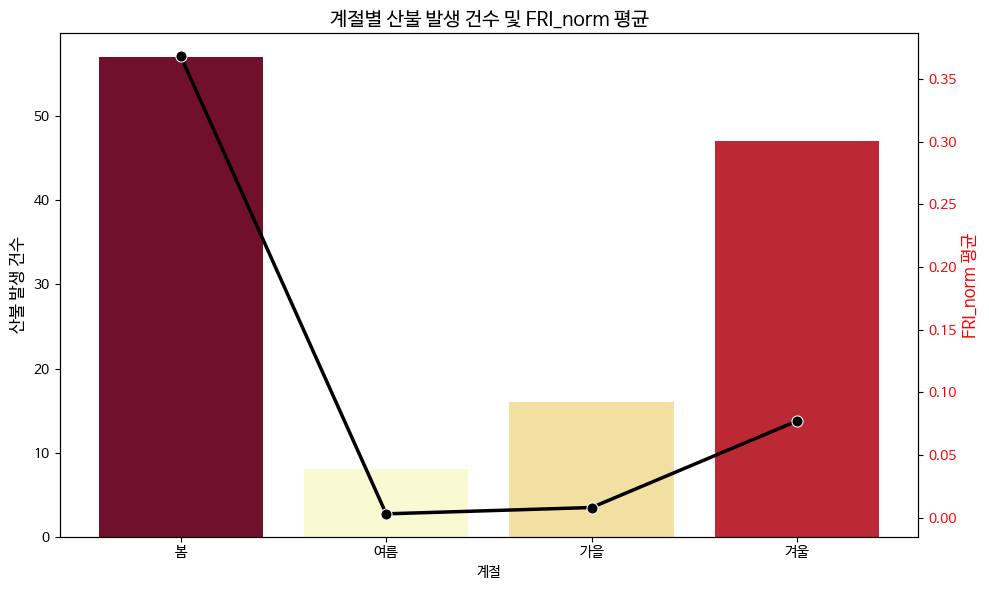

In [ ]:
# 계절 순서 지정
order = ["봄", "여름", "가을", "겨울"]

# 색상 맵핑을 위한 정규화
counts = summary.set_index('계절').loc[order]['산불건수']
norm = (counts - counts.min()) / (counts.max() - counts.min())
colors = [plt.cm.YlOrRd(val) for val in norm]

# 시각화 시작
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대그래프: 정규화 색상 사용
sns.barplot(
    data=summary, x='계절', y='산불건수', ax=ax1,
    order=order, palette=colors
)
ax1.set_ylabel("산불 발생 건수", fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')

# 선그래프: FRI_norm 평균 (빨간색 선 + 원형 마커)
ax2 = ax1.twinx()
sns.lineplot(
    data=summary, x='계절', y='FRI_norm_평균',
    ax=ax2, color='black', marker='o', linewidth=2.5, markersize=8
)
ax2.set_ylabel("FRI_norm 평균", fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 제목 및 정리
plt.title("계절별 산불 발생 건수 및 FRI_norm 평균", fontsize=14)
plt.tight_layout()
plt.show()










In [ ]:
# 피해 면적이 있는 행만 사용
damage_summary = df[df['피해면적(ha)'] > 0].groupby('계절').agg({
    '피해면적(ha)': ['count', 'mean']
}).reset_index()

damage_summary.columns = ['계절', '건수', '평균면적']
damage_summary['건수x평균면적'] = damage_summary['건수'] * damage_summary['평균면적']
damage_summary

,계절,건수,평균면적,건수x평균면적
0,가을,16,0.165000,2.64
1,겨울,47,12.056596,566.66
2,봄,57,49.664211,2830.86
3,여름,8,0.071250,0.57


In [ ]:
fri_means = fri_all_concat.groupby('계절')['FRI_norm'].mean().reset_index()
summary = pd.merge(damage_summary, fri_means, on='계절')
summary = summary.rename(columns={'FRI_norm': 'FRI_norm_평균'})

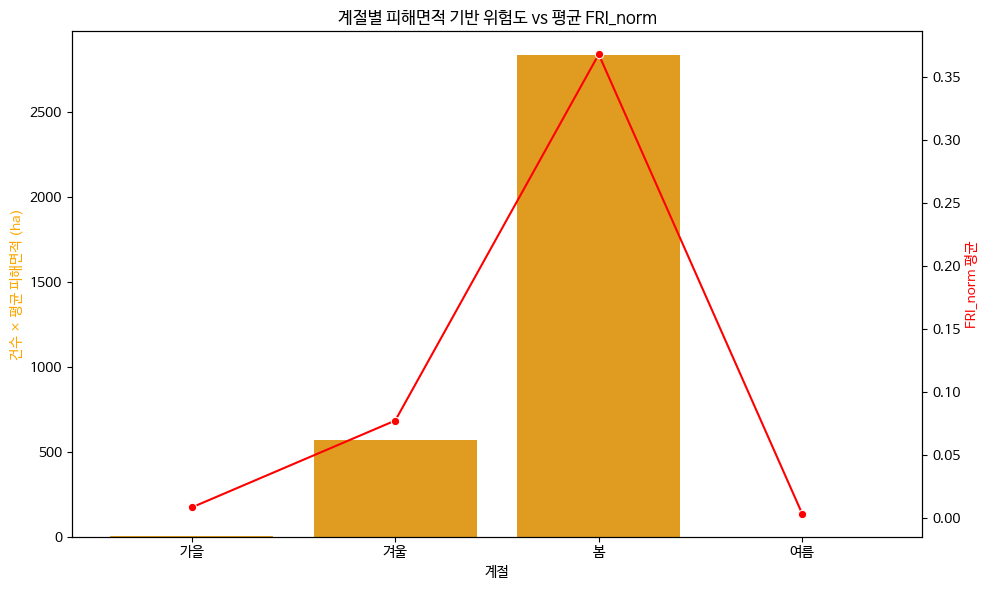

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 위험지표 바플롯
sns.barplot(data=summary, x='계절', y='건수x평균면적', ax=ax1, color='orange')
ax1.set_ylabel("건수 × 평균 피해면적 (ha)", color='orange')

# FRI_norm 평균 선그래프
ax2 = ax1.twinx()
sns.lineplot(data=summary, x='계절', y='FRI_norm_평균', ax=ax2, color='red', marker='o')
ax2.set_ylabel("FRI_norm 평균", color='red')

plt.title("계절별 피해면적 기반 위험도 vs 평균 FRI_norm")
plt.tight_layout()
plt.show()

### 로지스틱 회귀


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import pandas as pd
import statsmodels.api as sm # statsmodels 임포트

# 1. 산불 발생 여부 컬럼 생성
fri_all_concat['산불발생여부'] = (fri_all_concat['건수'] > 0).astype(int)

# 2. X, y 정의
# statsmodels 로지스틱 회귀는 상수항을 수동으로 추가해야 합니다.
X = sm.add_constant(fri_all_concat[['FRI_norm']].values)
y = fri_all_concat['산불발생여부'].values

# 3. 로지스틱 회귀 모델 학습 (statsmodels 사용)
model = sm.Logit(y, X).fit() # Logit 함수 사용

# 4. 예측 및 평가 (statsmodels 모델은 predict와 predict_proba가 다릅니다)
# predict는 클래스 예측 (0 또는 1)
y_pred = (model.predict(X) > 0.5).astype(int) # 확률이 0.5 이상이면 1로 예측

# predict_proba에 해당하는 것은 그냥 predict 결과 자체입니다 (0~1 사이 확률)
y_prob = model.predict(X)

print(model.summary()) # statsmodels 모델은 summary() 메소드를 제공합니다.
print()
print(classification_report(y, y_pred))
print(f"ROC AUC: {roc_auc_score(y, y_prob):.3f}")
# statsmodels 모델에서 계수 및 절편 가져오기 (상수항이 첫 번째 계수)
print(f"계수 (FRI_norm): {model.params[1]:.3f}")
print(f"절편: {model.params[0]:.3f}")

Optimization terminated successfully.
         Current function value: 0.647102
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  360
Model:                          Logit   Df Residuals:                      358
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 May 2025   Pseudo R-squ.:                 0.06342
Time:                        04:33:40   Log-Likelihood:                -232.96
converged:                       True   LL-Null:                       -248.73
Covariance Type:            nonrobust   LLR p-value:                 1.943e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2647      0.130     -2.036      0.042      -0.519      -0.010
x1             4.0612      0.

In [ ]:
fri_all_concat

,격자ID,중심위도,중심경도,건수,FireDensity,계절,FFMC_revised,Seasonal Weight_엔트로피,FRI,계절영문,FRI_norm,산불발생여부
0,0_0,36.406035,128.525209,0.0,0.000000,봄,49.958060,3.027593,75.626341,fri_spring_en,0.197192,0
1,0_1,36.406035,128.580209,0.0,0.000000,봄,49.958060,3.027593,75.626341,fri_spring_en,0.197192,0
2,0_2,36.406035,128.635209,2.0,0.666667,봄,49.958060,3.027593,176.461461,fri_spring_en,0.464795,1
3,0_3,36.406035,128.690209,0.0,0.000000,봄,49.958060,3.027593,75.626341,fri_spring_en,0.197192,0
4,0_4,36.406035,128.745209,0.0,0.000000,봄,49.958060,3.027593,75.626341,fri_spring_en,0.197192,0
...,...,...,...,...,...,...,...,...,...,...,...,...
355,9_4,36.811035,128.745209,1.0,0.333333,겨울,39.848588,0.823037,27.330732,fri_winter_en,0.069022,1
356,9_5,36.811035,128.800209,1.0,0.333333,겨울,39.848588,0.823037,27.330732,fri_winter_en,0.069022,1
357,9_6,36.811035,128.855209,0.0,0.000000,겨울,39.848588,0.823037,16.398439,fri_winter_en,0.040010,0
358,9_7,36.811035,128.910209,0.0,0.000000,겨울,39.848588,0.823037,16.398439,fri_winter_en,0.040010,0


In [ ]:
df[df['피해면적(ha)']>=5]

,요일,시도,시군구,상세주소,발생원인,피해면적(ha),계절
60,일요일,경상북도,안동시,풍천면 어담리 산46-1,농산부산물소각,18.30,봄
63,수요일,경상북도,안동시,도산면 운곡리 산48,기타,13.20,봄
65,금요일,경상북도,안동시,풍천면 인금리 산114,입산자실화,1944.00,봄
73,일요일,경상북도,안동시,임동면 망천리 산329,기타,307.00,겨울
89,화요일,경상북도,안동시,도산면 의일리 산122,농산부산물소각,10.84,봄
106,수요일,경상북도,안동시,도산면 문곡리 산48,기타,13.20,봄
108,금요일,경상북도,안동시,풍천면 인금리 산114,입산자실화,800.00,봄
113,일요일,경상북도,안동시,임동면 망천리 산329,기타,250.00,겨울
125,화요일,경상북도,안동시,도산면 의일리 산122,농산부산물소각,10.00,봄
